In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import torch.optim as optim 
import sys 
import os 
import matplotlib.pyplot as plt

In [2]:
project_basedir=os.path.join('..','..', '..')
project_basedir = os.path.abspath(project_basedir)
print("Adding {} to the front of the path".format(project_basedir)) 
sys.path.insert(0,project_basedir)

Adding C:\Users\vatsyaya\ai-ws\autodiff.light to the front of the path


In [3]:
import tests.core.np.TestModels as models
from core.np.datasets.Mnist784Dataset import Mnist784
import core.np.Nodes as node 
import core.np.Convolution as conv 
from core import debug, info, log_at_info, log_at_debug
import PIL
import core.np.Activations as act 
import core.np.Loss  as loss 
import core.np.Optimization as autodiff_optim 

In [4]:
mnist = Mnist784(load_cache=False)

Total number of data points:70000, number of training points:49000


In [5]:
mnist.save()

Saved data array into:C:\Users\vatsyaya\.autodiff.light\mnist\data784
Saved targets array into:C:\Users\vatsyaya\.autodiff.light\mnist\target784


In [6]:
mnist2=Mnist784()

lading data array from:C:\Users\vatsyaya\.autodiff.light\mnist\data784.npy
Loading targets array from:C:\Users\vatsyaya\.autodiff.light\mnist\target784.npy
Total number of data points:70000, number of training points:49000


In [7]:
x, y = None, None 
x_list=[] 
y_list=[]
for a,b in mnist.train_iterator(4,one_hot=True):
    x,y = a.reshape((28,28)), b
    x_list.append(x)
    y_list.append(y)
    print(y.T)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


(28, 28)
(10, 1)


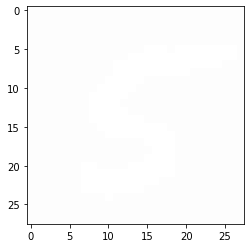

In [8]:
print(x.shape)
print(y.shape)
light_x = x+253 
plt.imshow( light_x,cmap='gray', vmin=0, vmax=255)
plt.show()

In [9]:
#print(repr(x))
diff=x_list[0]-x_list[3]
np.sum(np.square(diff))

7760217.0

In [10]:
img_node=node.VarNode('x')
edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
con = conv.Convolution2D(img_node, (28,28), kernel=edge_kernel)
img_node.forward({'x':light_x})

Created Node named:x-0
Created Node named:$Node-1


In [11]:
img = con.value() 
print(type(img))

<class 'numpy.ndarray'>


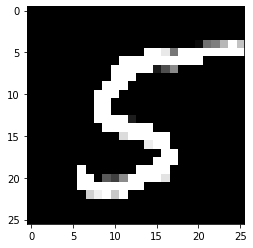

In [12]:
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()

In [13]:
log_at_debug()

In [14]:
x=node.VarNode('x')
yt=node.VarNode('yt')
linear1 = node.DenseLayer(x, 200, name="L1")
relu1 = act.RelUNode(linear1, name="RelU1")
linear2 = node.DenseLayer(relu1, 200, name="L2")
relu2 = act.RelUNode(linear2, name="RelU2")
linear3 = node.DenseLayer(relu2, 10, name="L2")
softmax = act.Softmax(linear3, name="Softmax")
cross_entropy = loss.CrossEntropy(softmax, yt)
optimizer_func = autodiff_optim.AdamOptimizer()
optimizer = autodiff_optim.OptimizerIterator([x,yt], cross_entropy, optimizer_func)

Created Node named:x-2
Created Node named:yt-3
Created Node named:L1-4
Created Node named:RelU1-5
Created Node named:L2-6
Created Node named:RelU2-7
Created Node named:L2-8
Created Node named:Softmax-9
Created Node named:$Node-10


In [15]:
epochs=1
batch_size=1
epoch=0
log_at_debug() 
for x, y in mnist.train_iterator(epochs, batch_size):
    x = x.reshape((28,28))/255
    var_map = {'x': x, 'yt': y}
    loss_now = optimizer.step(var_map, 1.0) / batch_size
    if epoch % 100 == 0:
        info("[{}]\tloss_now = {}".format(epoch, loss_now))
    epoch += 1

resetting x-2
resetting L1-4
resetting RelU1-5
resetting L2-6
resetting RelU2-7
resetting L2-8
resetting Softmax-9
resetting $Node-10
resetting yt-3
resetting $Node-10
DenseLayer.forward() W=np.array([[0.91657461, 0.30520114, 0.41186676, ..., 0.8624094 , 0.48675252,
        0.84296569],
       [0.05735831, 0.74484469, 0.46254135, ..., 0.28006978, 0.38043544,
        0.62952084],
       [0.33005987, 0.85998533, 0.38215785, ..., 0.11546577, 0.3644127 ,
        0.42691812],
       ...,
       [0.82767434, 0.34057032, 0.15417596, ..., 0.39653042, 0.14442587,
        0.79937959],
       [0.69687513, 0.62251411, 0.95688196, ..., 0.2996987 , 0.22025879,
        0.5445437 ],
       [0.27207942, 0.33421927, 0.48817204, ..., 0.20925814, 0.53298933,
        0.00976592]])
DenseLayer.forward() b=np.array([[0.17616921],
       [0.5480631 ],
       [0.81328723],
       [0.34370917],
       [0.7358454 ],
       [0.67780575],
       [0.28461054],
       [0.01011484],
       [0.49607986],
       [0.7526